# COVID-19 Prediction task

## Importing modules

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



## Global constants and plot settings

In [26]:
DATA_DIR = 'covid19-global-forecasting-week-3/'
FIG_SIZE = (6,4)
myFmt = mdates.DateFormatter('%m-%d')


## Loading train and test data

### Getting geo data along with weather data
#### Data set source : https://www.kaggle.com/davidbnn92/weather-data

In [27]:
# Training raw dataset
train_ds = pd.read_csv('training_data_with_weather_info_week_3.csv')
# Testing dataset
test_ds = pd.read_csv(DATA_DIR+'test.csv')

## Initial inspections on the dataset

In [98]:
train_ds.info()
print('\n---------------------------------------\n')
print('No. of Countries : {}'.format(train_ds['Country_Region'].nunique() ))

print('\n -------------------------------\n')
train_ds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22338 entries, 0 to 22337
Data columns (total 19 columns):
Id                    22338 non-null int64
Province_State        9490 non-null object
Country_Region        22338 non-null object
Date                  22338 non-null object
ConfirmedCases        22338 non-null float64
Fatalities            22338 non-null float64
country+province      22338 non-null object
Lat                   22338 non-null float64
Long                  22338 non-null float64
day_from_jan_first    22338 non-null int64
temp                  22338 non-null float64
min                   22219 non-null float64
max                   22309 non-null float64
stp                   22338 non-null float64
slp                   13336 non-null float64
dewp                  21740 non-null float64
wdsp                  22338 non-null float64
prcp                  22338 non-null float64
fog                   22338 non-null int64
dtypes: float64(12), int64(3), object(4)
memory

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,temp,min,max,stp,slp,dewp,wdsp,prcp,fog
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,Afghanistan-,33.0,65.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,9.4,0.00,0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0,Afghanistan-,33.0,65.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,14.9,99.99,1
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0,Afghanistan-,33.0,65.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,10.4,0.17,1
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0,Afghanistan-,33.0,65.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,6.1,0.57,1
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0,Afghanistan-,33.0,65.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,10.8,0.00,1


In [29]:
ds_india = train_ds[train_ds['Country_Region']=='India']
ds_india['Date'] = pd.to_datetime(ds_india['Date'])

ds_usa = train_ds[train_ds['Country_Region']=='US']

ds_usa['Date'] = pd.to_datetime(ds_usa['Date'])


# Graphing the results

## India Vs US comparison

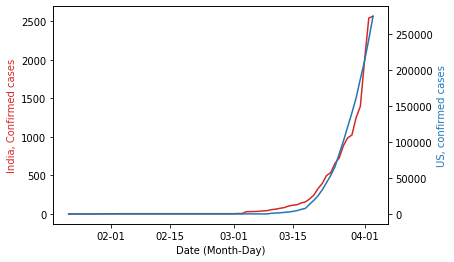

In [30]:
fig = plt.figure(figsize=FIG_SIZE)
ax = fig.add_subplot(111)
color = 'tab:red'
ax.plot(ds_india['Date'],ds_india['ConfirmedCases'],c=color)
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel('Date (Month-Day)')
ax.set_ylabel('India, Confirmed cases',color=color)

ax2 = ax.twinx()
color = 'tab:blue'
ax2.plot(ds_india['Date'],ds_usa.groupby(['Date']).agg({'ConfirmedCases':['sum']}),c=color)
ax2.set_ylabel('US, confirmed cases',color=color)
ax2.xaxis.set_major_formatter(myFmt)

## Confirmed cases vs latitude/longitude

* binning latitude and longitude range
* For a particular box of (∂ lat, ∂ long), calculate total cases (avergaing across region)
* Draw a scatter plot

In [115]:
# Making 50 bins for latitude and longitude 
lat_range = np.linspace(train_ds['Lat'].min(), train_ds['Lat'].max(),200)
long_range = np.linspace(train_ds['Long'].min(), train_ds['Long'].max(),200)


In [127]:
confirmed_cases_lat = []
deaths_lat = []
df_date = train_ds[train_ds['Date']=='2020-04-01']
for i in range(199):
    
    df_temp =df_date[df_date['Lat'].between(lat_range[i],lat_range[i+1])]
    confirmed_cases_lat.append(df_temp['ConfirmedCases'].sum())
    deaths_lat.append(df_temp['Fatalities'].sum())




confirmed_cases_long = []
deaths_long = []
df_date = train_ds[train_ds['Date']=='2020-04-01']
for i in range(199):
    
    df_temp =df_date[df_date['Long'].between(long_range[i],long_range[i+1])]
    confirmed_cases_long.append(df_temp['ConfirmedCases'].sum())
    deaths_long.append(df_temp['Fatalities'].sum())


Text(0, 0.5, 'Deaths')

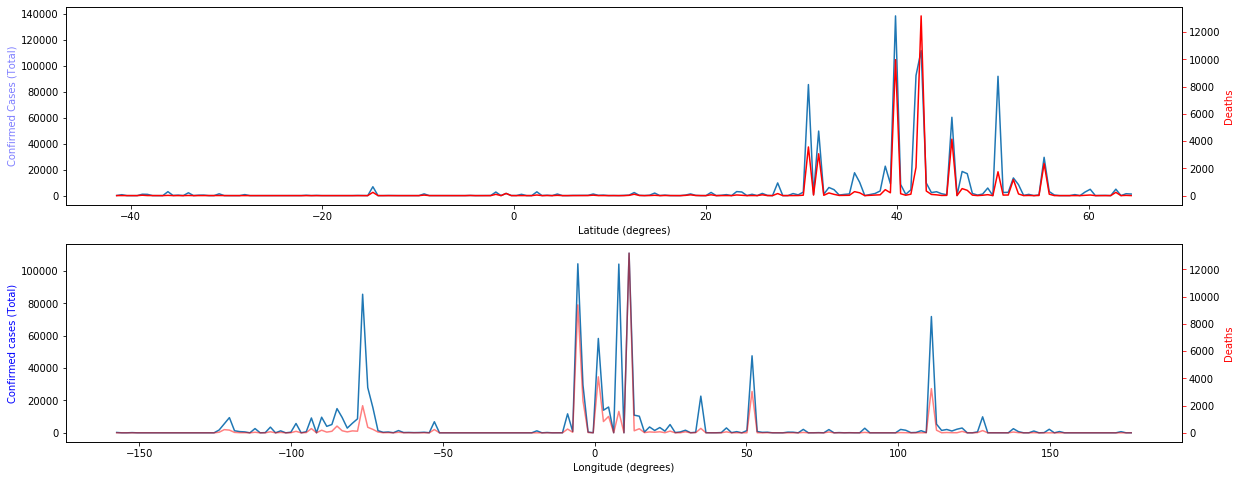

In [152]:
fig = plt.figure(figsize= (20,8))
ax = fig.add_subplot(211)
ax.plot( lat_range[:-1], confirmed_cases_lat)
ax.set_ylabel('Confirmed Cases (Total)',color='b',alpha=0.5)
ax.set_xlabel('Latitude (degrees)')
axx = ax.twinx()
axx.plot(lat_range[:-1],deaths_lat,'r')
axx.set_ylabel('Deaths', color='r')
axx.tick_params(axis='y',color='red')


ax2 = fig.add_subplot(212)
ax2.plot(long_range[:-1], confirmed_cases_long)
ax2.set_xlabel('Longitude (degrees)')
ax2.set_ylabel('Confirmed cases (Total)',color='b')
axx2 = ax2.twinx()
axx2.plot(long_range[:-1], deaths_long,'r',alpha=0.5)
axx2.tick_params(axis='y',color='red')
axx2.set_ylabel('Deaths',color='red')

